## Data Analysis

In [73]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [74]:
path = 'weather (1).csv'
dataframe = pd.read_csv(path)

dataframe


,Time,Temperature,Humidity,UV,Cloud cover
0,00:00,26,89%,1,0 mm
1,03:00,25,92%,1,0 mm
2,06:00,25,93%,6,0 mm
3,09:00,29,72%,7,0 mm
4,12:00,32,62%,7,1.4 mm
5,15:00,30,70%,7,0 mm
6,18:00,28,82%,1,0.4 mm
7,21:00,26,94%,1,0 mm


## HUMIDITY

In [75]:
humidity = dataframe[['Time','Humidity']]
humidity


,Time,Humidity
0,00:00,89%
1,03:00,92%
2,06:00,93%
3,09:00,72%
4,12:00,62%
5,15:00,70%
6,18:00,82%
7,21:00,94%


In [76]:
dataframe['Humidity'].str[0:2]

0    89
1    92
2    93
3    72
4    62
5    70
6    82
7    94
Name: Humidity, dtype: object

In [77]:
print(set(dataframe['Humidity'].str[0:2]))

{'89', '93', '72', '92', '70', '82', '94', '62'}


#Average of humidity

In [78]:
s = pd.Series(dataframe['Humidity'].str[0:2])
pd.to_numeric(s, errors= 'ignore')

0    89
1    92
2    93
3    72
4    62
5    70
6    82
7    94
Name: Humidity, dtype: int64

#Average humidity

In [79]:
avg_humidity = pd.to_numeric(dataframe['Humidity'].str[0:2], downcast='integer').mean()
print(avg_humidity)

81.75


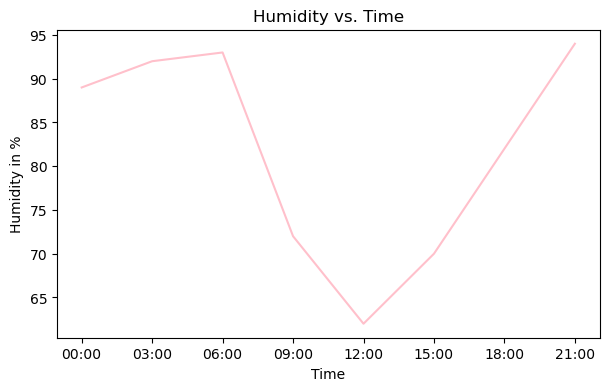

In [80]:
time = dataframe['Time'].head(12)
humidity = pd.to_numeric(dataframe['Humidity'].str[0:2], downcast= 'integer')

#figure size
fig = plt.figure(figsize = (7, 4))

#Honrizontal Plot
plt.plot(time[0:10], humidity[0:10], color = 'pink')

plt.xlabel('Time')
plt.ylabel('Humidity in %')
plt.title('Humidity vs. Time')

#Show plot
plt.show()

## TEMPERATURE

In [81]:
temperature = dataframe[['Time', 'Temperature']]
temperature

,Time,Temperature
0,00:00,26
1,03:00,25
2,06:00,25
3,09:00,29
4,12:00,32
5,15:00,30
6,18:00,28
7,21:00,26


#Find heat amplitute

In [82]:
heat_amplitute = dataframe['Temperature'].max() - dataframe['Temperature'].min()
print(heat_amplitute)

7


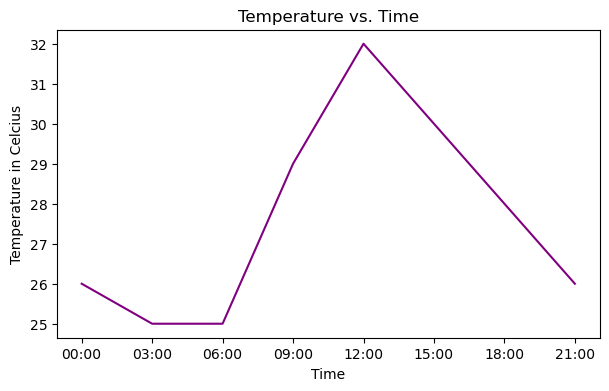

In [83]:
time = dataframe['Time'].head(12)
temperature = dataframe['Temperature'].head(12)

#figure size
fig = plt.figure(figsize = (7, 4))

#Honrizontal Plot
plt.plot(time[0:10], temperature[0:10], color = 'purple')

plt.xlabel('Time')
plt.ylabel('Temperature in Celcius')
plt.title('Temperature vs. Time')

#Show plot
plt.show()

## UV

In [84]:
uv = dataframe[['Time','UV']]
uv

,Time,UV
0,00:00,1
1,03:00,1
2,06:00,6
3,09:00,7
4,12:00,7
5,15:00,7
6,18:00,1
7,21:00,1


#Find max UV vs. Time

In [85]:
print(dataframe['UV'].max())
# Waring 

7


#Warning

In [86]:
uv = dataframe['UV']
high_uv = dataframe['High_UV']= uv.apply(lambda x : 'Yes' if x >= 6 else 'No')
dataframe['Status'] = high_uv.apply(lambda x : 'Harmful to skins' if x == 'Yes' else 'Not very Harmful')

dataframe[['Time', 'UV', 'High_UV', 'Status']]

,Time,UV,High_UV,Status
0,00:00,1,No,Not very Harmful
1,03:00,1,No,Not very Harmful
2,06:00,6,Yes,Harmful to skins
3,09:00,7,Yes,Harmful to skins
4,12:00,7,Yes,Harmful to skins
5,15:00,7,Yes,Harmful to skins
6,18:00,1,No,Not very Harmful
7,21:00,1,No,Not very Harmful


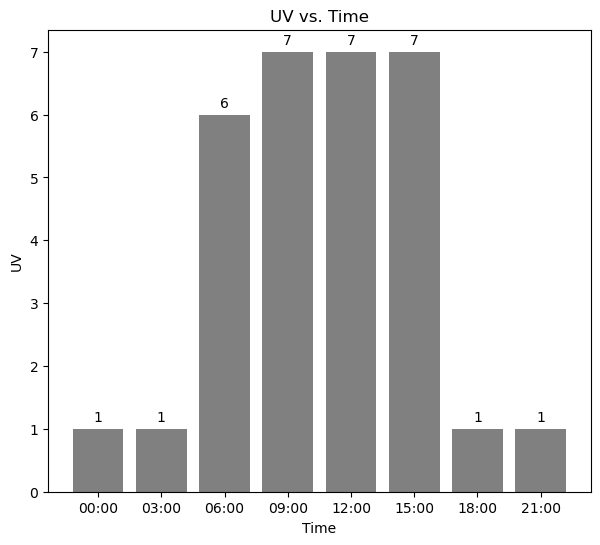

In [87]:
time = dataframe['Time'].head(12)
uv = dataframe['UV'].head(12)

#figure size
fig, ax = plt.subplots(figsize = (7, 6))

#Honrizontal Bar Plot
bars = ax.bar(time[0:10], uv[0:10], color = 'grey')

plt.xlabel('Time')
plt.ylabel('UV')
plt.title('UV vs. Time')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

#Show plot
plt.show()

## CLOUD COVER

In [88]:
humidity = dataframe[['Time','Cloud cover']]
humidity


,Time,Cloud cover
0,00:00,0 mm
1,03:00,0 mm
2,06:00,0 mm
3,09:00,0 mm
4,12:00,1.4 mm
5,15:00,0 mm
6,18:00,0.4 mm
7,21:00,0 mm


In [89]:
dataframe['Cloud cover'].str[:-2]

0      0 
1      0 
2      0 
3      0 
4    1.4 
5      0 
6    0.4 
7      0 
Name: Cloud cover, dtype: object

In [90]:
print(set(dataframe['Cloud cover'].str[:-2]))

{'0.4 ', '1.4 ', '0 '}


In [91]:
s = pd.Series(dataframe['Cloud cover'].str[:-2])
s1 = pd.to_numeric(s, errors= 'ignore')
s1


0    0.0
1    0.0
2    0.0
3    0.0
4    1.4
5    0.0
6    0.4
7    0.0
Name: Cloud cover, dtype: float64

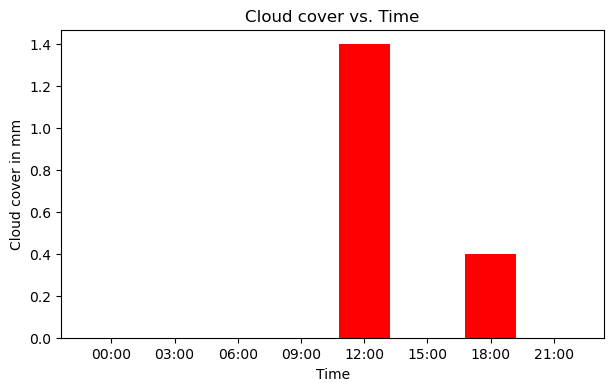

In [92]:
time = dataframe['Time'].head(12)
cloud_cover = pd.to_numeric(dataframe['Cloud cover'].str[:-2], downcast= 'float')

#figure size
fig, ax = plt.subplots(figsize = (7, 4))

#Honrizontal Bar Plot
bars = ax.bar(time[0:10], cloud_cover[0:10], color = 'red')

plt.xlabel('Time')
plt.ylabel('Cloud cover in mm')
plt.title('Cloud cover vs. Time')

#Show plot
plt.show()